# 🎮 What Makes a Video Game Successful?
## An Exploratory Data Analysis of VGChartz Sales Data

### Objective
This project explores the factors that influence the commercial success
of video games using historical sales data from VGChartz.

The analysis focuses on understanding trends across platforms, genres,
publishers, regions, and time using exploratory data analysis (EDA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

In [10]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
df.shape

(16598, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Dataset Columns

- **Rank**: Ranking based on global sales
- **Name**: Video game title
- **Platform**: Platform of release
- **Year**: Release year
- **Genre**: Game genre
- **Publisher**: Publishing company
- **NA_Sales**: North America sales (millions)
- **EU_Sales**: Europe sales (millions)
- **JP_Sales**: Japan sales (millions)
- **Other_Sales**: Sales in rest of the world (millions)
- **Global_Sales**: Total worldwide sales (millions)

In [14]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [33]:
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

In [21]:
df.reset_index(drop=True, inplace=True)

### Global Sales Distribution
Global sales represent the total worldwide performance of each game.
This section analyzes its distribution and skewness.

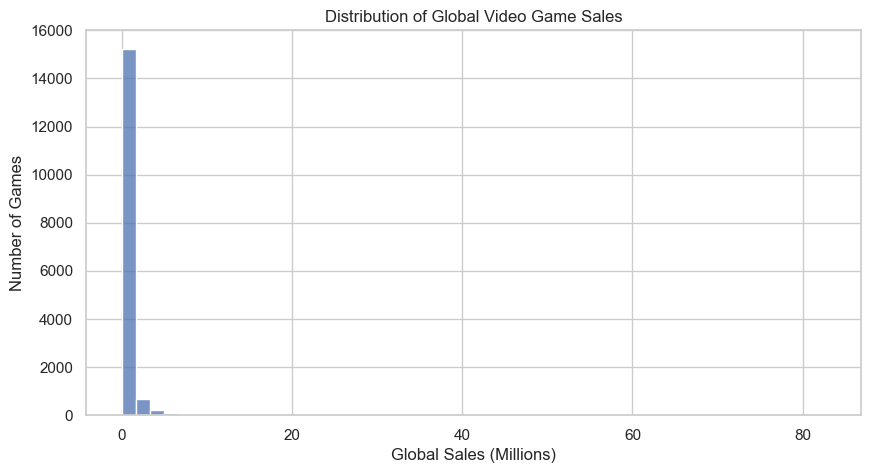

In [24]:
sns.histplot(df['Global_Sales'], bins=50)
plt.title("Distribution of Global Video Game Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Number of Games")
plt.show()

### Top Selling Video Games
This section highlights the highest-selling video games of all time.

In [25]:
top_games = df.sort_values('Global_Sales', ascending=False).head(10)
top_games[['Name','Platform','Global_Sales']]

,Name,Platform,Global_Sales
0,Wii Sports,Wii,82.74
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.82
3,Wii Sports Resort,Wii,33.00
4,Pokemon Red/Pokemon Blue,GB,31.37
5,Tetris,GB,30.26
6,New Super Mario Bros.,DS,30.01
7,Wii Play,Wii,29.02
8,New Super Mario Bros. Wii,Wii,28.62
9,Duck Hunt,NES,28.31


### Genre Analysis
Analyzing the popularity and sales performance of different game genres.

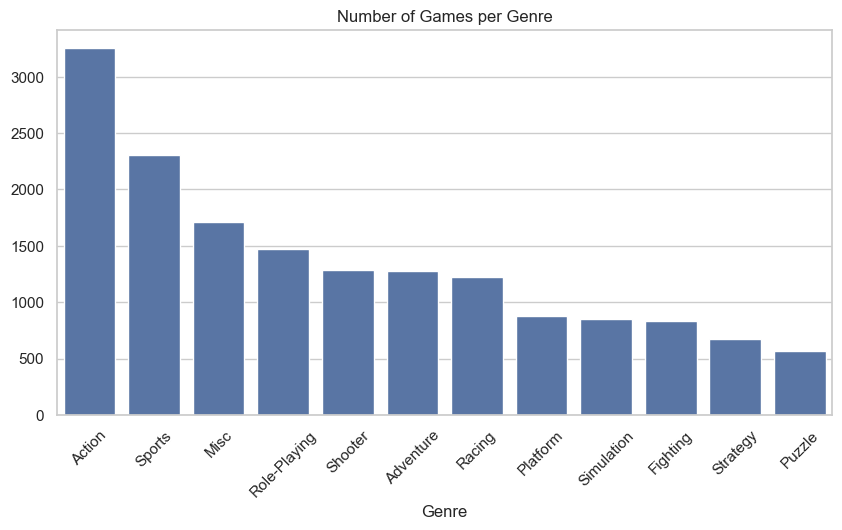

In [26]:
genre_count = df['Genre'].value_counts()

sns.barplot(x=genre_count.index, y=genre_count.values)
plt.xticks(rotation=45)
plt.title("Number of Games per Genre")
plt.show()

### Platform Analysis
Exploring how different gaming platforms affect sales.

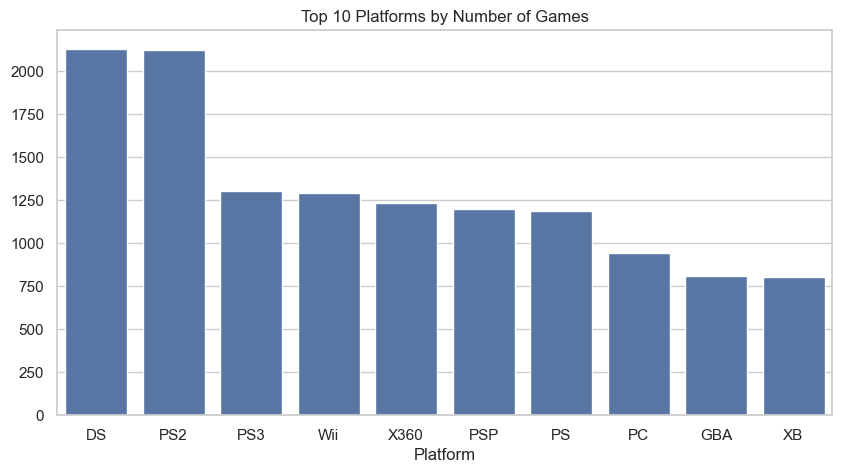

In [27]:
platform_count = df['Platform'].value_counts().head(10)

sns.barplot(x=platform_count.index, y=platform_count.values)
plt.title("Top 10 Platforms by Number of Games")
plt.show()

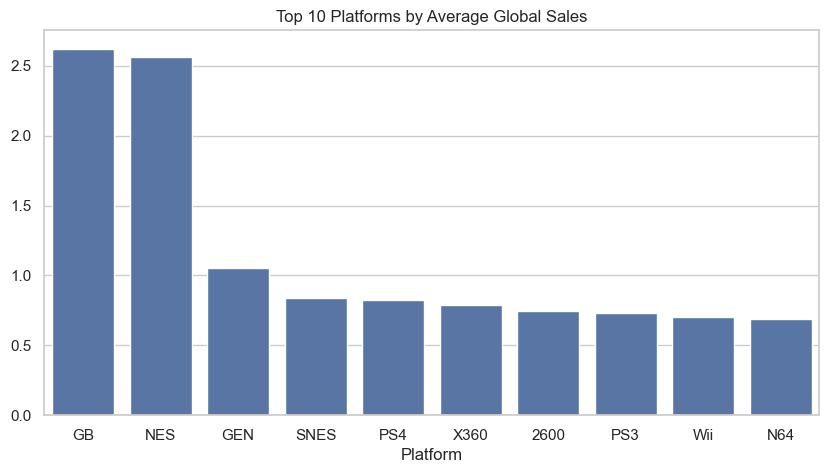

In [28]:
platform_sales = df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title("Top 10 Platforms by Average Global Sales")
plt.show()

### Regional Sales Analysis
Understanding how game preferences differ across regions.

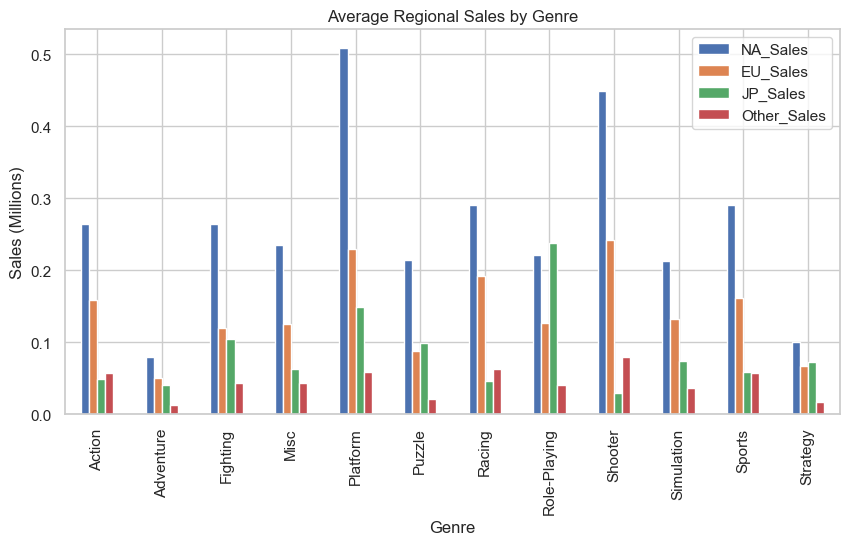

In [29]:
region_sales = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean()

region_sales.plot(kind='bar')
plt.title("Average Regional Sales by Genre")
plt.ylabel("Sales (Millions)")
plt.show()

### Time-Based Trends
Analyzing changes in game releases and sales over time.

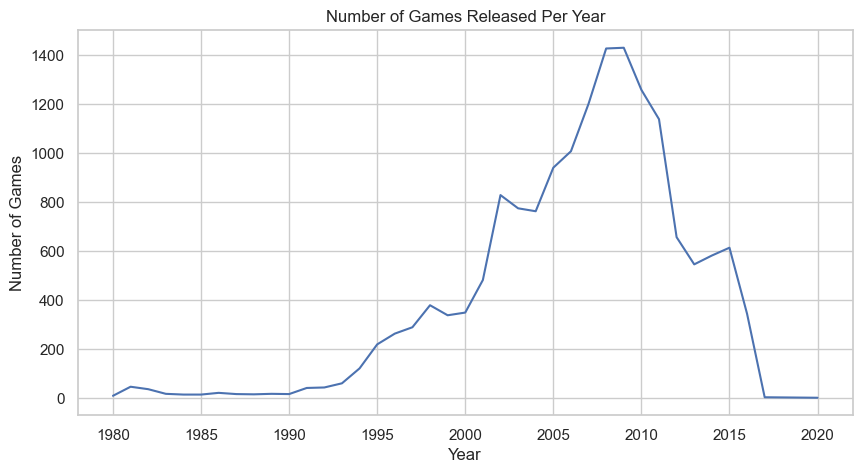

In [30]:
games_per_year = df['Year'].value_counts().sort_index()

plt.plot(games_per_year.index, games_per_year.values)
plt.title("Number of Games Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

### Publisher Analysis
Identifying dominant publishers in the gaming industry.

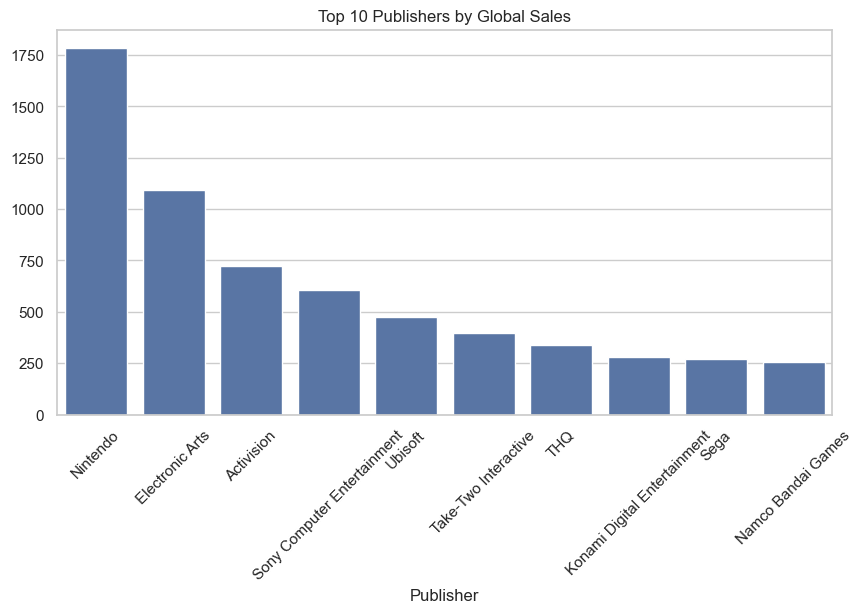

In [31]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=publisher_sales.index, y=publisher_sales.values)
plt.xticks(rotation=45)
plt.title("Top 10 Publishers by Global Sales")
plt.show()

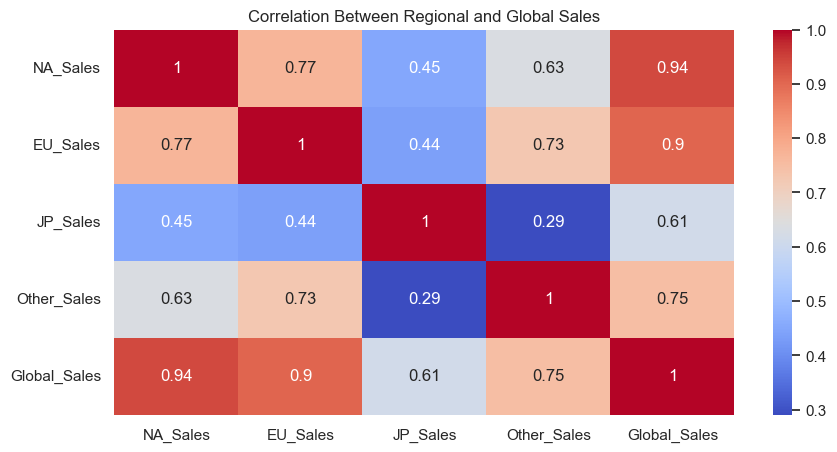

In [32]:
corr = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Regional and Global Sales")
plt.show()

### Key Insights

- Action and Sports games dominate global sales.
- Japan shows a strong preference for RPG titles.
- Platform choice plays a significant role in sales success.
- A small number of publishers contribute a large share of total sales.